In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Hackathon_KH/train_loan_data (1).csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,w,25.89,25850,5.0,4.0,220521.0,12,0,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,w,12.29,6975,2.0,2.0,245781.0,7,0,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,w,10.99,7000,1.0,3.0,382274.0,9,0,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,w,19.47,18000,3.0,3.0,201841.0,16,1,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


In [6]:
df.query('earliest_cr_line == "Jul-97" and addr_state == "CO"')

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
41195,CO,96000.0,Jul-97,10+ years,Sr Technical Analyst,694,690,B,RENT,Individual,f,9.75,35000,3.0,2.0,66463.0,7,0,0.0,debt_consolidation,35808,60.1,B3,60 months,Debt consolidation,30,Source Verified,Paid
66006,CO,110000.0,Jul-97,10+ years,IT Specialist,684,680,C,MORTGAGE,Individual,w,13.99,30000,4.0,2.0,331008.0,10,0,0.0,credit_card,31003,80.5,C4,60 months,Credit card refinancing,40,Verified,Paid


In [7]:
# Convert the column to date type
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [8]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the feature
df['grade'] = encoder.fit_transform(df[['grade']])

In [10]:
a = df['emp_length'].unique()
a = a.tolist()
a

['10+ years',
 nan,
 '3 years',
 '< 1 year',
 '1 year',
 '8 years',
 '7 years',
 '4 years',
 '2 years',
 '5 years',
 '6 years',
 '9 years']

In [11]:
mapping = {
    '< 1 year': 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years': 10
}
# Map the corresponding values using the mapping dictionary
df['emp_length'] = df['emp_length'].map(mapping)

# Print the updated column
df['emp_length']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
79995    10.0
79996    10.0
79997     0.0
79998     3.0
79999     2.0
Name: emp_length, Length: 80000, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder to the data and transform the data
df['loan_status'] = encoder.fit_transform(df['loan_status'])

In [13]:
a = df['term'].unique().tolist()
a

[' 60 months', ' 36 months']

In [14]:
mapping = {
    ' 60 months' : 60 ,
    ' 36 months': 36
}
# Map the corresponding values using the mapping dictionary
df['term'] = df['term'].map(mapping)

# Print the updated column
df['term']

0        60
1        36
2        36
3        36
4        60
         ..
79995    60
79996    36
79997    36
79998    60
79999    36
Name: term, Length: 80000, dtype: int64

In [15]:
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [16]:
# Drop the rows with null values in the 'pub_rec_bankruptcies','title','revol_util' column.
df = df.dropna(subset=['pub_rec_bankruptcies'])
df = df.dropna(subset=['revol_util'])
df = df.dropna(subset=['title'])

In [17]:
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,1997-07-01,10.0,Deputy,744,740,4.0,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60,Debt consolidation,8,Source Verified,0
1,CA,40000.0,1987-04-01,10.0,Department of Veterans Affairs,724,720,1.0,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36,Credit Loan,12,Verified,1
2,FL,60000.0,2007-08-01,10.0,Marble polishing,679,675,1.0,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36,Debt consolidation,16,Source Verified,1
3,IL,100742.0,1980-09-01,10.0,printer,664,660,1.0,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36,Debt consolidation,19,Source Verified,1
4,MD,80000.0,1999-07-01,10.0,Southern Mgmt,669,665,5.0,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60,Debt Connsolidation,59,Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,2000-02-01,10.0,Sports Group Manager,664,660,6.0,MORTGAGE,Individual,w,25.89,25850,5.0,4.0,220521.0,12,0,0.0,debt_consolidation,20201,93.5,G3,60,Debt consolidation,42,Verified,0
79996,NH,45000.0,1995-08-01,10.0,Web Designer,684,680,2.0,MORTGAGE,Individual,w,12.29,6975,2.0,2.0,245781.0,7,0,0.0,debt_consolidation,6145,56.9,C1,36,Debt consolidation,14,Not Verified,1
79997,NY,90000.0,2005-04-01,0.0,Program Officer,724,720,1.0,OWN,Individual,w,10.99,7000,1.0,3.0,382274.0,9,0,0.0,debt_consolidation,3910,25.6,B4,36,Debt consolidation,26,Source Verified,1
79998,TX,94000.0,1992-04-01,3.0,Sr. Business Analyst,669,665,3.0,MORTGAGE,Individual,w,19.47,18000,3.0,3.0,201841.0,16,1,1.0,credit_card,11897,49.4,D5,60,Credit card refinancing,48,Source Verified,1


In [18]:
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4452
emp_title               4880
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3910
mort_acc                2735
tot_cur_bal             3910
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies       0
purpose                    0
revol_bal                  0
revol_util                 0
sub_grade                  0
term                       0
title                      0
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [19]:
df.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,loan_status
count,7.894700e+04,74495.000000,78947.00000,78947.000000,78947.000000,78947.000000,78947.000000,75037.000000,76212.000000,7.503700e+04,78947.000000,78947.000000,78947.000000,7.894700e+04,78947.000000,78947.000000,78947.000000,78947.000000
mean,7.611154e+04,5.963528,700.06113,696.060965,1.741827,13.230626,14409.330944,3.636366,1.677794,1.418850e+05,11.616870,0.215309,0.136459,1.632000e+04,51.906843,41.776939,25.055480,0.801740
std,6.917780e+04,3.685130,31.77748,31.776705,1.294596,4.768509,8704.826985,2.261073,2.007249,1.593527e+05,5.484097,0.577710,0.382179,2.268369e+04,24.523877,10.260353,12.019013,0.398691
min,0.000000e+00,0.000000,664.00000,660.000000,0.000000,5.310000,1000.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,36.000000,2.000000,0.000000
25%,4.600000e+04,2.000000,674.00000,670.000000,1.000000,9.750000,7975.000000,2.000000,0.000000,2.973300e+04,8.000000,0.000000,0.000000,5.979000e+03,33.500000,36.000000,16.000000,1.000000
50%,6.500000e+04,6.000000,694.00000,690.000000,2.000000,12.740000,12000.000000,3.000000,1.000000,8.141400e+04,11.000000,0.000000,0.000000,1.113200e+04,52.300000,36.000000,23.000000,1.000000
75%,9.000000e+04,10.000000,714.00000,710.000000,2.000000,15.990000,20000.000000,5.000000,3.000000,2.115580e+05,14.000000,0.000000,0.000000,1.966600e+04,70.800000,36.000000,32.000000,1.000000
max,7.141778e+06,10.000000,850.00000,845.000000,6.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,60.000000,162.000000,1.000000


In [20]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [21]:
df['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [22]:
df['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'small_business', 'medical', 'major_purchase', 'car', 'vacation',
       'house', 'moving', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

In [23]:
name_list = df['emp_title']

In [24]:
name_counts = {}
for name in name_list:
  if name in name_counts:
    name_counts[name] += 1
  else:
    name_counts[name] = 1

In [25]:
max_value = max(name_counts, key=name_counts.get)
largest_key = max_value
largest_value = name_counts[max_value]

print("Largest Key:", largest_key)
print("Largest Value:", largest_value)

Largest Key: nan
Largest Value: 4880


In [26]:
sorted_dict = dict(sorted(name_counts.items(), key=lambda x: (x[1] is None, x[1]), reverse=True))
sorted_dict

{nan: 4880,
 'Teacher': 1260,
 'Manager': 1176,
 'Owner': 575,
 'RN': 519,
 'Registered Nurse': 509,
 'Supervisor': 500,
 'Sales': 454,
 'Driver': 414,
 'Project Manager': 349,
 'Office Manager': 340,
 'General Manager': 296,
 'owner': 294,
 'manager': 291,
 'Director': 273,
 'Engineer': 255,
 'President': 235,
 'teacher': 233,
 'Vice President': 208,
 'driver': 206,
 'Operations Manager': 205,
 'Attorney': 194,
 'Accountant': 176,
 'Administrative Assistant': 172,
 'Sales Manager': 172,
 'Truck Driver': 165,
 'Account Manager': 165,
 'Nurse': 163,
 'Police Officer': 157,
 'Technician': 155,
 'Executive Assistant': 148,
 'Analyst': 148,
 'sales': 142,
 'supervisor': 135,
 'Store Manager': 129,
 'Software Engineer': 121,
 'Consultant': 121,
 'Server': 118,
 'truck driver': 113,
 'Controller': 112,
 'Mechanic': 108,
 'Electrician': 108,
 'Paralegal': 108,
 'Account Executive': 107,
 'Branch Manager': 107,
 'Business Analyst': 101,
 'IT Manager': 100,
 'Registered nurse': 99,
 'CEO': 97,


<Axes: xlabel='loan_amnt', ylabel='Count'>

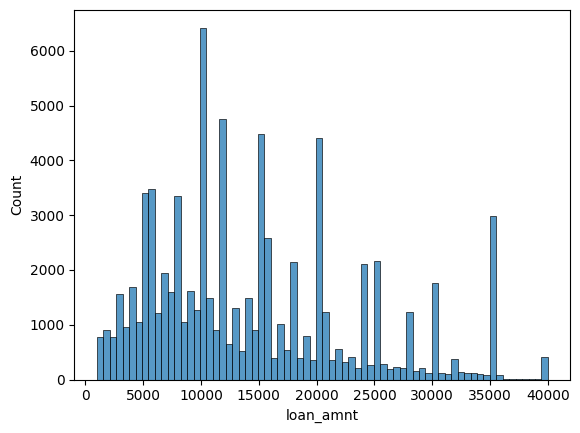

In [27]:
import seaborn as sns

# Plot the distribution of a single feature
sns.histplot(df['loan_amnt'])

<Axes: xlabel='pub_rec_bankruptcies', ylabel='Count'>

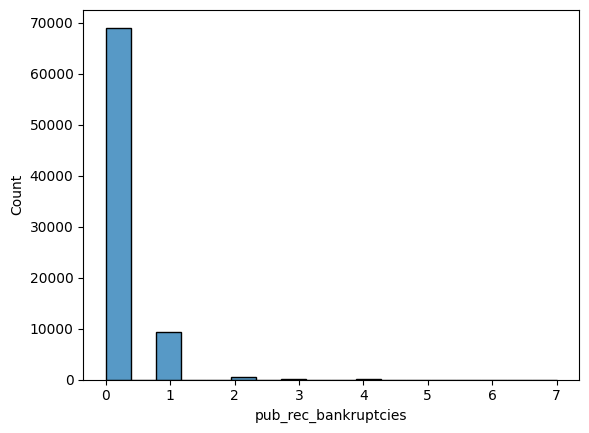

In [28]:
sns.histplot(df['pub_rec_bankruptcies'])

In [29]:
df['loan_amnt'].skew()

0.7873540159230203

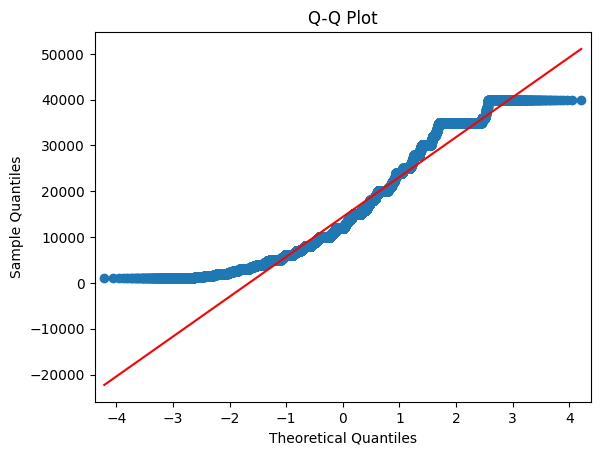

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(df['loan_amnt'], line='s')
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

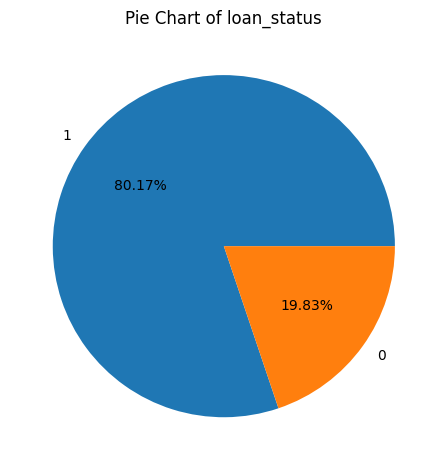

In [31]:
# Select the column you want to create a pie chart for
feature_column = 'loan_status'

# Calculate the value counts and percentages
value_counts = df[feature_column].value_counts()
percentages = value_counts / len(df) * 100

# Add a title to the chart
plt.title("Pie Chart of {}".format(feature_column))

# Add the percentages as text outside each slice
_, _, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%.2f%%')
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Display the chart
plt.tight_layout()

# 1 Means PAID
# 0 means DEFAULTED

In [32]:
from sklearn.impute import KNNImputer
import numpy as np

# Define the columns you want to impute
columns = ["num_actv_bc_tl", "mort_acc", "tot_cur_bal", "emp_length"]

# Create an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors to use

# Fit the imputer on the data with the specified columns
imputer.fit(df[columns])

# Impute the missing values in the specified columns
df[columns] = imputer.transform(df[columns])

In [33]:
# Calculate the mode of the feature.
mode = df['emp_title'].mode()[0]

# Fill the missing values in the feature with the mode.
df['emp_title'].fillna(mode, inplace=True)

In [34]:
df.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [35]:
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,1997-07-01,10.0,Deputy,744,740,4.0,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60,Debt consolidation,8,Source Verified,0
1,CA,40000.0,1987-04-01,10.0,Department of Veterans Affairs,724,720,1.0,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36,Credit Loan,12,Verified,1
2,FL,60000.0,2007-08-01,10.0,Marble polishing,679,675,1.0,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36,Debt consolidation,16,Source Verified,1
3,IL,100742.0,1980-09-01,10.0,printer,664,660,1.0,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36,Debt consolidation,19,Source Verified,1
4,MD,80000.0,1999-07-01,10.0,Southern Mgmt,669,665,5.0,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60,Debt Connsolidation,59,Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,2000-02-01,10.0,Sports Group Manager,664,660,6.0,MORTGAGE,Individual,w,25.89,25850,5.0,4.0,220521.0,12,0,0.0,debt_consolidation,20201,93.5,G3,60,Debt consolidation,42,Verified,0
79996,NH,45000.0,1995-08-01,10.0,Web Designer,684,680,2.0,MORTGAGE,Individual,w,12.29,6975,2.0,2.0,245781.0,7,0,0.0,debt_consolidation,6145,56.9,C1,36,Debt consolidation,14,Not Verified,1
79997,NY,90000.0,2005-04-01,0.0,Program Officer,724,720,1.0,OWN,Individual,w,10.99,7000,1.0,3.0,382274.0,9,0,0.0,debt_consolidation,3910,25.6,B4,36,Debt consolidation,26,Source Verified,1
79998,TX,94000.0,1992-04-01,3.0,Sr. Business Analyst,669,665,3.0,MORTGAGE,Individual,w,19.47,18000,3.0,3.0,201841.0,16,1,1.0,credit_card,11897,49.4,D5,60,Credit card refinancing,48,Source Verified,1


In [36]:
numerical_df = df.select_dtypes(include=[np.number]).copy()

In [37]:
numerical_df

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,loan_status
0,85000.0,10.0,744,740,4.0,18.99,18075,1.0,1.0,319479.0,7,0,0.0,5338,93.6,60,8,0
1,40000.0,10.0,724,720,1.0,10.16,8800,4.0,0.0,19944.0,5,0,0.0,19944,60.3,36,12,1
2,60000.0,10.0,679,675,1.0,11.47,18000,4.0,2.0,23199.0,7,0,0.0,23199,88.5,36,16,1
3,100742.0,10.0,664,660,1.0,9.16,20000,4.0,1.0,72651.0,12,0,0.0,18425,69.0,36,19,1
4,80000.0,10.0,669,665,5.0,23.83,35000,14.0,7.0,64631.0,23,0,0.0,34370,90.0,60,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,10.0,664,660,6.0,25.89,25850,5.0,4.0,220521.0,12,0,0.0,20201,93.5,60,42,0
79996,45000.0,10.0,684,680,2.0,12.29,6975,2.0,2.0,245781.0,7,0,0.0,6145,56.9,36,14,1
79997,90000.0,0.0,724,720,1.0,10.99,7000,1.0,3.0,382274.0,9,0,0.0,3910,25.6,36,26,1
79998,94000.0,3.0,669,665,3.0,19.47,18000,3.0,3.0,201841.0,16,1,1.0,11897,49.4,60,48,1


In [38]:
numerical_df.isnull().sum()

annual_inc              0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
term                    0
total_acc               0
loan_status             0
dtype: int64

In [39]:
numerical_df['annual_inc']

0          85000.0
1          40000.0
2          60000.0
3         100742.0
4          80000.0
           ...    
79995      81000.0
79996      45000.0
79997      90000.0
79998      94000.0
79999    1100000.0
Name: annual_inc, Length: 78947, dtype: float64

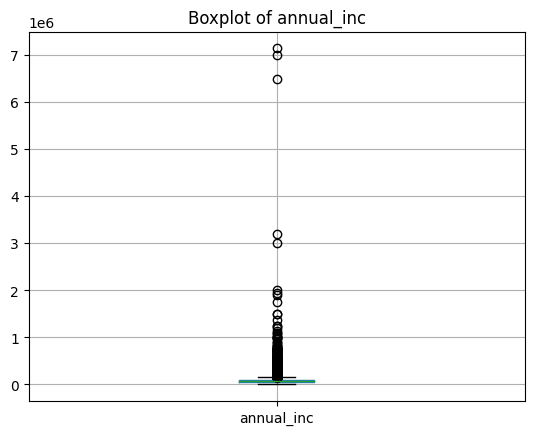

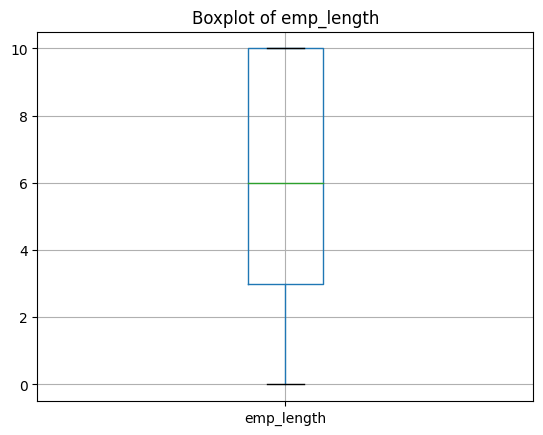

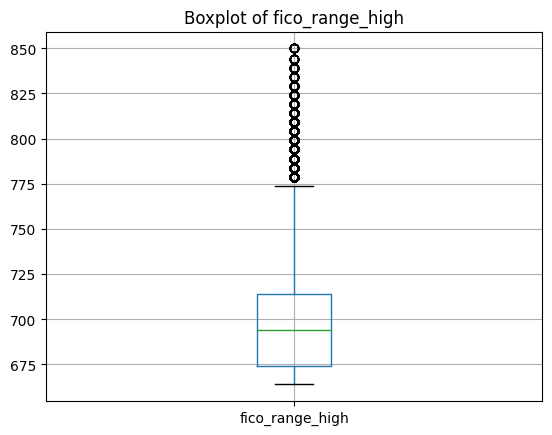

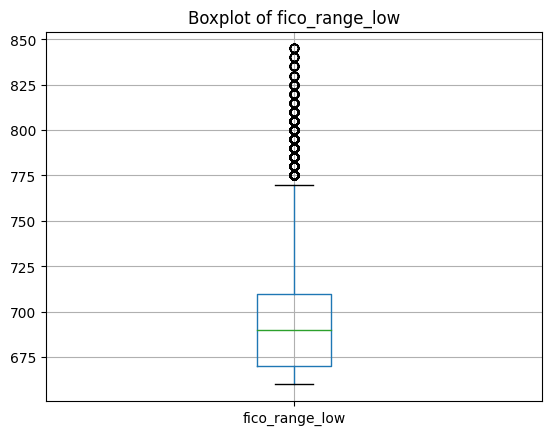

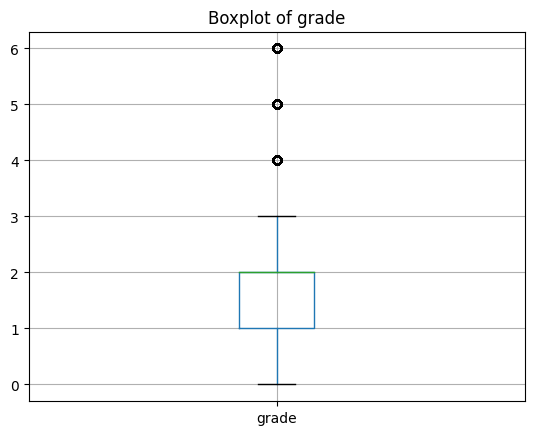

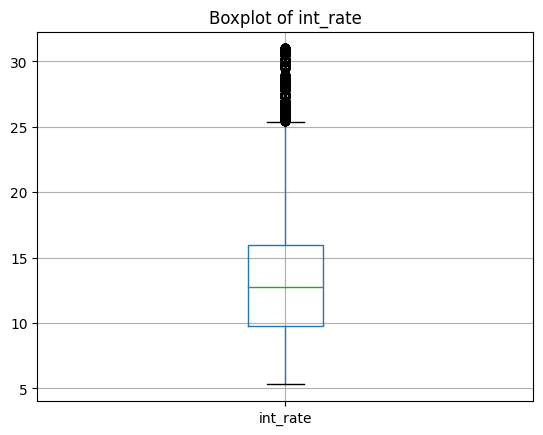

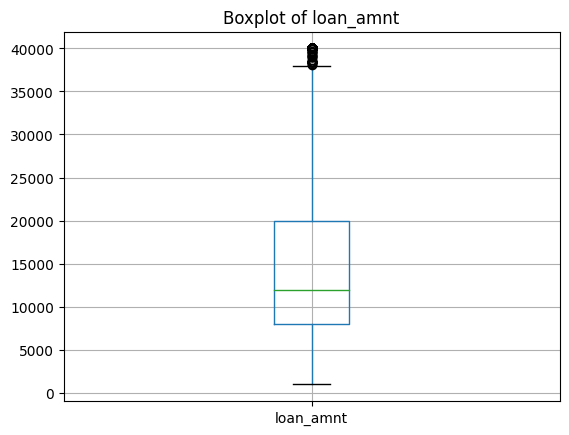

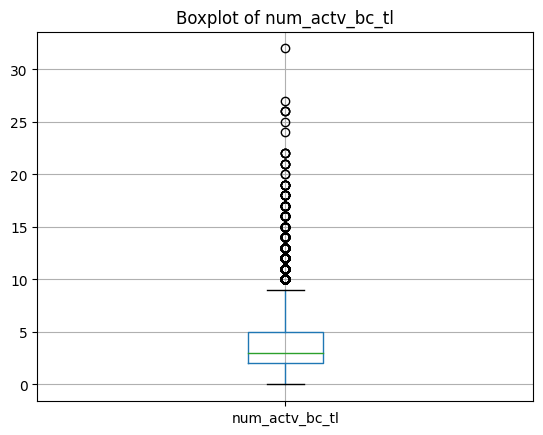

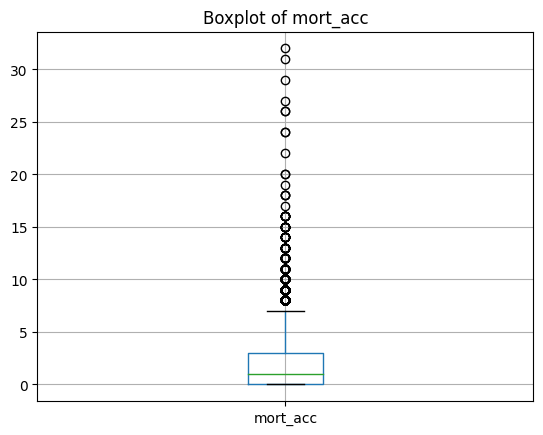

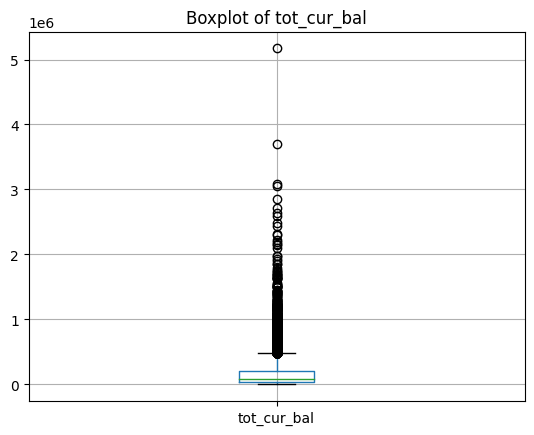

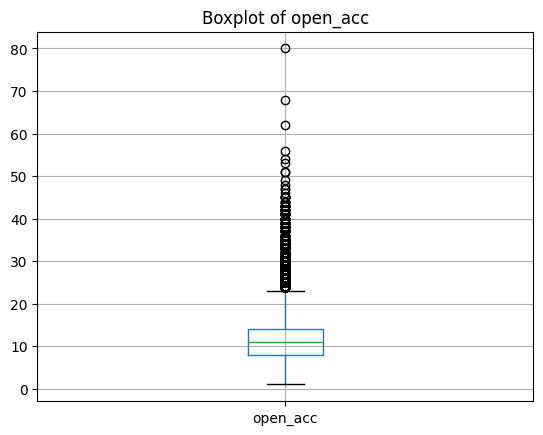

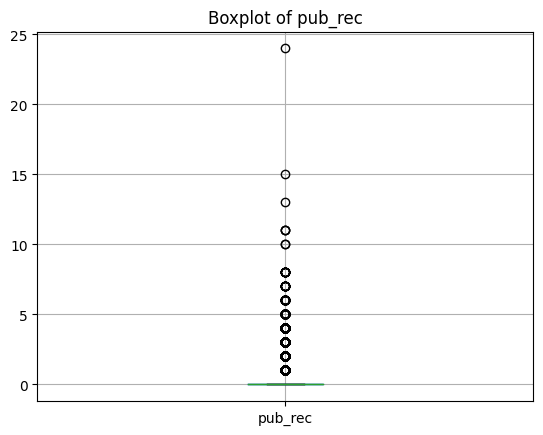

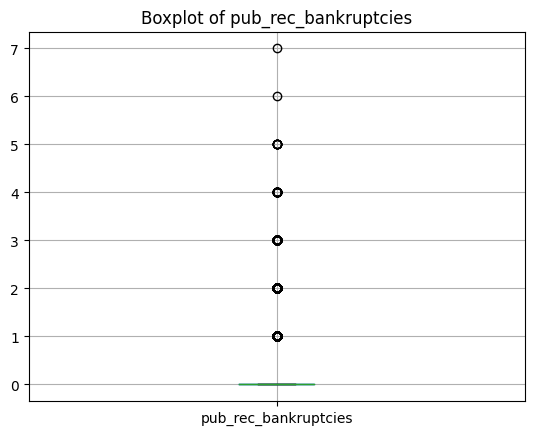

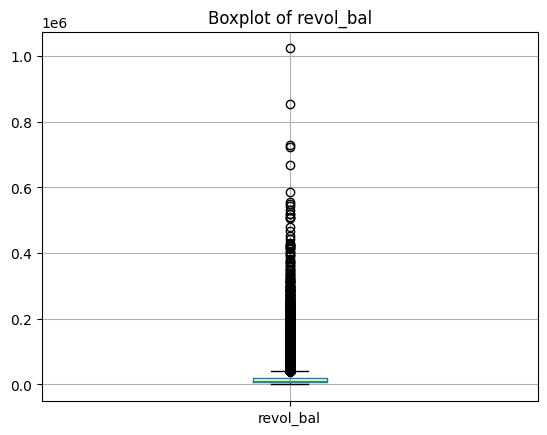

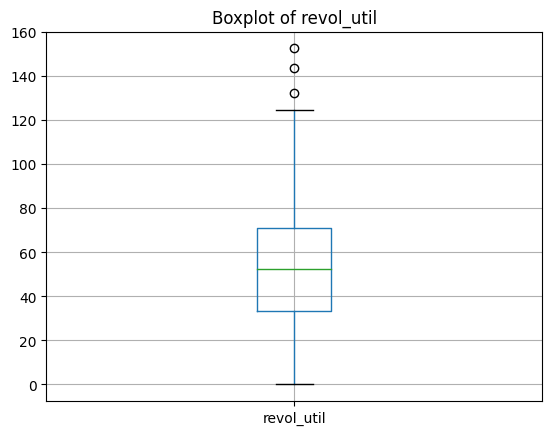

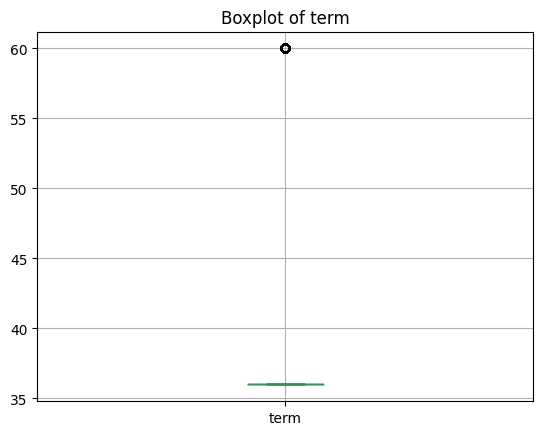

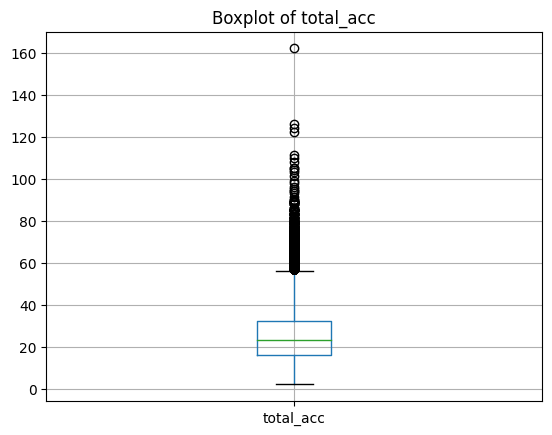

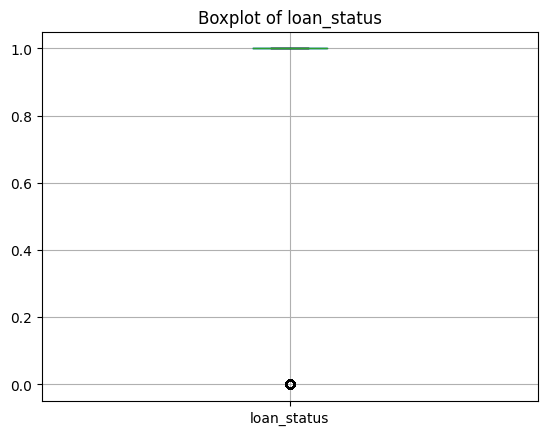

In [40]:
# Create a boxplot for each feature in the dataset
for column in numerical_df.columns:
    plt.figure()
    numerical_df.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [41]:
from scipy.stats import mstats

# Assuming you have a DataFrame called 'numerical_df' with your dataset
# and 'annual_inc' is the column you want to winsorize

# Specify the column you want to winsorize
column_to_winsorize = 'annual_inc'

# Winsorize the column at the 1st and 99th percentile
winsorized_data = mstats.winsorize(numerical_df[column_to_winsorize], limits=[0.01, 0.01])

# Replace the original column with the winsorized values
numerical_df[column_to_winsorize] = winsorized_data

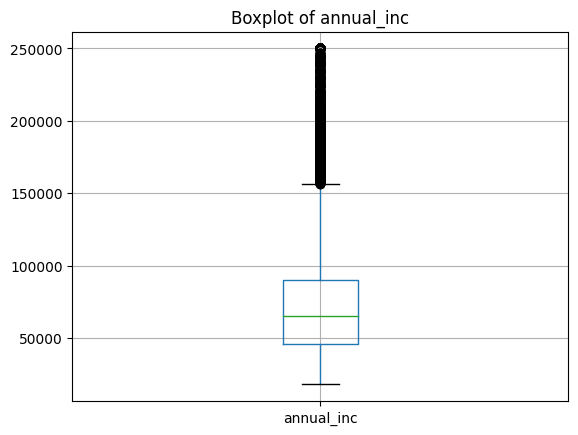

In [42]:
plt.figure()
numerical_df.boxplot(column='annual_inc')
plt.title(f"Boxplot of {'annual_inc'}")
plt.show()

In [43]:
numerical_df["annual_inc"].describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count     78947.000000
mean      74481.869478
std       41761.801810
min       18000.000000
25%       46000.000000
50%       65000.000000
75%       90000.000000
max      250000.000000
Name: annual_inc, dtype: float64

In [44]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
correlation_matrix

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,loan_status
annual_inc,1.000000,0.098017,0.096344,0.096344,-0.096814,-0.101270,0.478821,0.162079,0.323629,0.537344,0.205737,-0.010667,-0.063293,0.387792,0.064470,0.089721,0.265448,0.061882
emp_length,0.098017,1.000000,0.016614,0.016613,0.001500,0.000285,0.090692,0.077879,0.197037,0.108367,0.046289,0.028190,0.025312,0.080418,0.038275,0.062262,0.108556,0.011688
fico_range_high,0.096344,0.016614,1.000000,1.000000,-0.404411,-0.403510,0.100047,-0.106167,0.086916,0.132288,0.015022,-0.204941,-0.204752,0.022812,-0.454393,0.000048,0.013683,0.127777
fico_range_low,0.096344,0.016613,1.000000,1.000000,-0.404415,-0.403513,0.100047,-0.106168,0.086915,0.132289,0.015022,-0.204944,-0.204756,0.022815,-0.454394,0.000050,0.013683,0.127779
grade,-0.096814,0.001500,-0.404411,-0.404415,1.000000,0.953708,0.143829,0.017877,-0.073244,-0.082781,0.000878,0.064112,0.064601,-0.027686,0.236425,0.427274,-0.035237,-0.259818
int_rate,-0.101270,0.000285,-0.403510,-0.403513,0.953708,1.000000,0.144773,0.020867,-0.076226,-0.085830,-0.004169,0.056987,0.061428,-0.028644,0.239968,0.420173,-0.040899,-0.255499
loan_amnt,0.478821,0.090692,0.100047,0.100047,0.143829,0.144773,1.000000,0.194214,0.222567,0.304171,0.182793,-0.063610,-0.088266,0.319501,0.104612,0.381290,0.204397,-0.064607
num_actv_bc_tl,0.162079,0.077879,-0.106167,-0.106168,0.017877,0.020867,0.194214,1.000000,0.030329,0.098257,0.532933,-0.035704,-0.059213,0.297269,0.101124,0.042824,0.285862,-0.037627
mort_acc,0.323629,0.197037,0.086916,0.086915,-0.073244,-0.076226,0.222567,0.030329,1.000000,0.524874,0.112445,-0.005523,0.007907,0.206830,0.029192,0.101182,0.354448,0.072154
tot_cur_bal,0.537344,0.108367,0.132288,0.132289,-0.082781,-0.085830,0.304171,0.098257,0.524874,1.000000,0.233484,-0.071746,-0.095943,0.449523,0.080639,0.096965,0.295735,0.071430


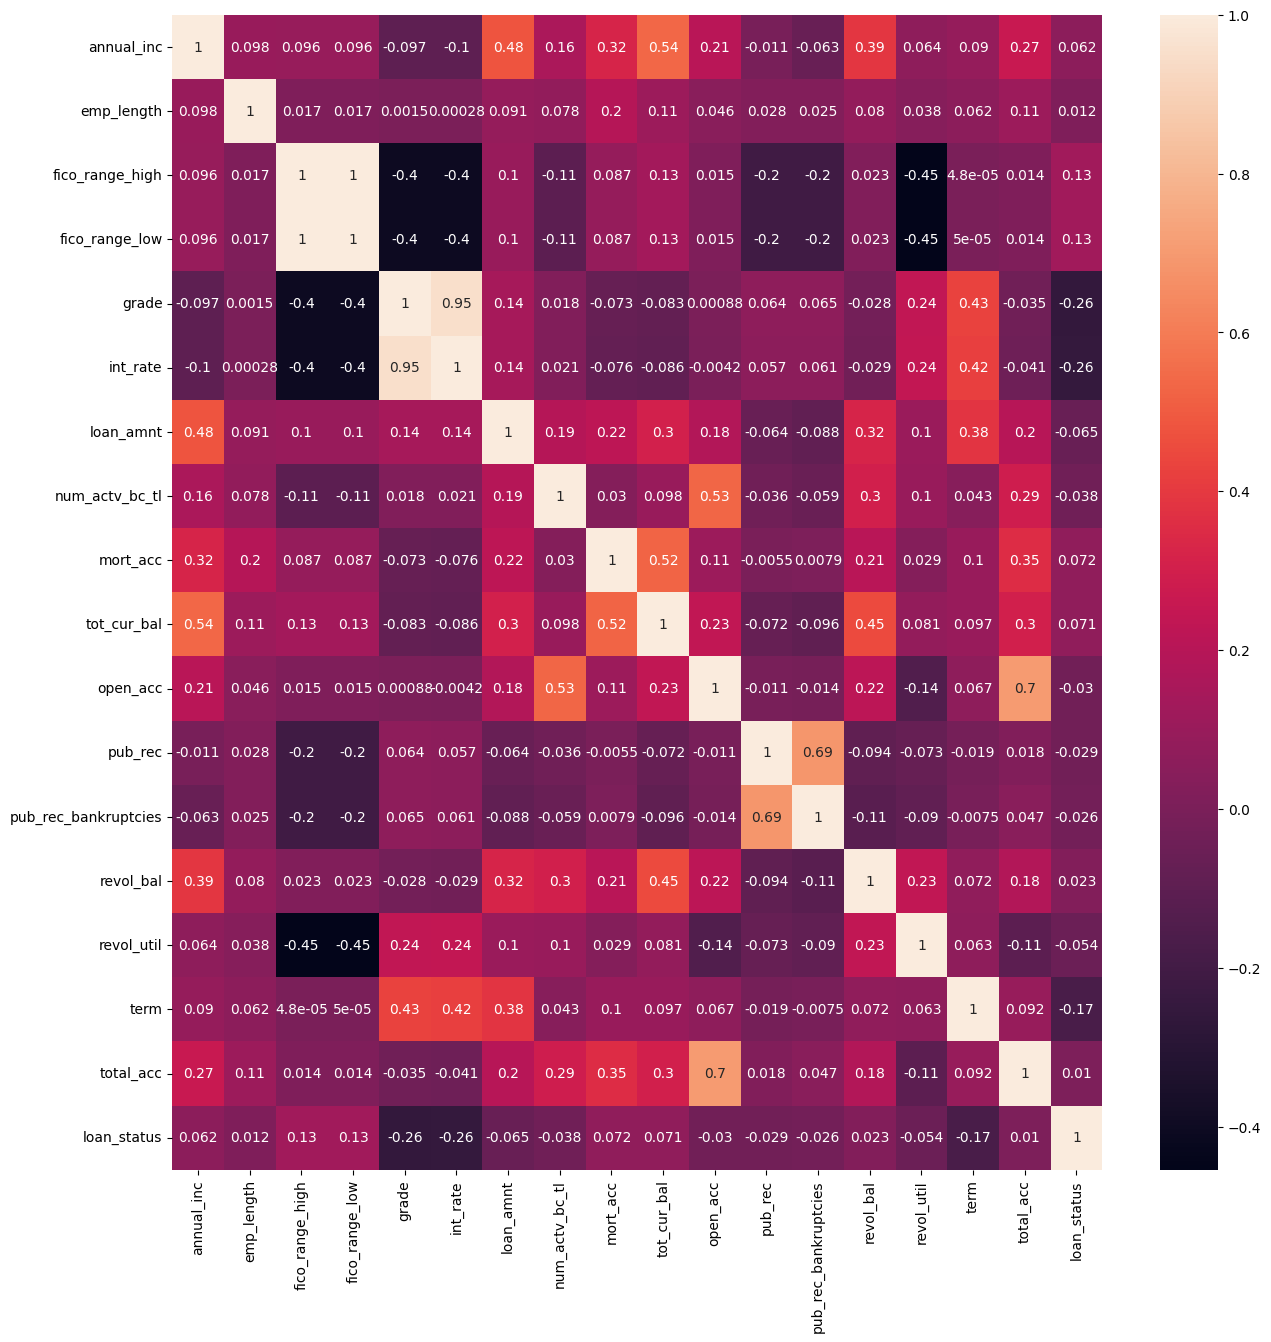

In [45]:
# Visualize the correlation matrix using a heatmap:
ax = sns.heatmap(correlation_matrix, annot=True)
plt.gcf().set_size_inches(15, 15)

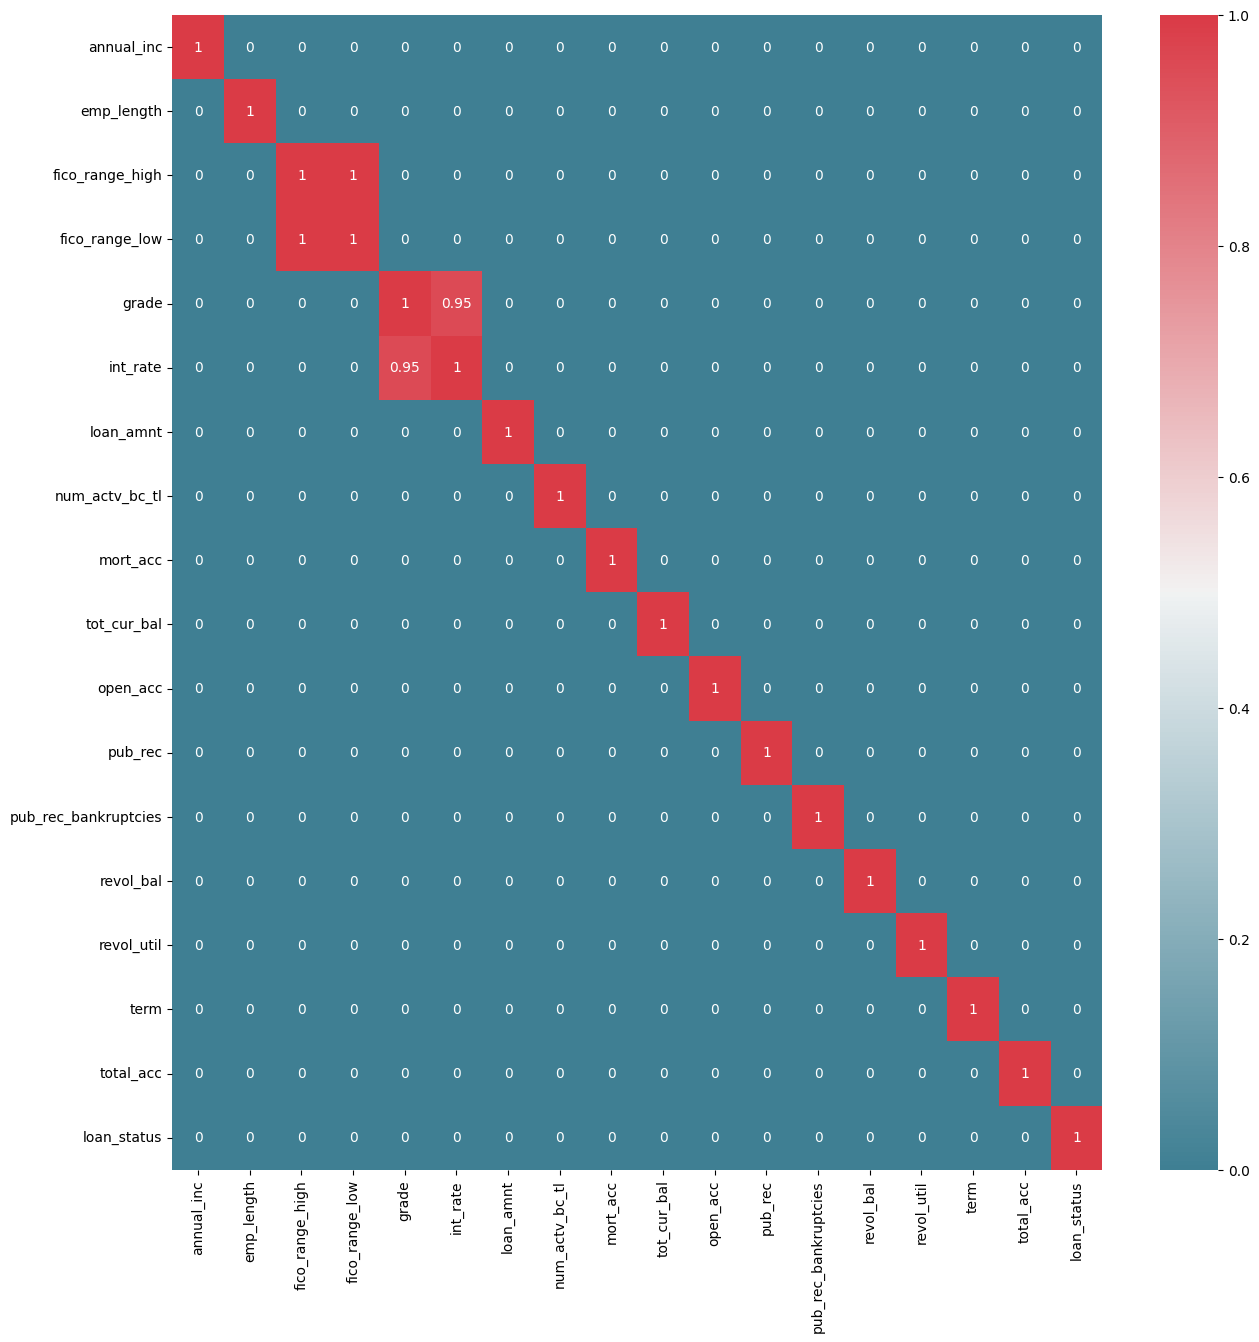

In [46]:
corr_matrix = correlation_matrix.copy()
# Set the threshold for high correlation.
threshold = 0.8


# Create a mask to highlight high values in the heatmap with high negative and positive correlation.
mask = abs(corr_matrix) <= threshold

# Set the values below the threshold to blank.
corr_matrix[mask] = 0

# Create a custom colormap to dim the rest of the values in the heatmap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap.
ax1 = sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.gcf().set_size_inches(15, 15)

In [47]:
pip install imbalanced-learn

In [48]:
# Splitting dataset, all columns but last into X, and last column into Y
X = numerical_df.iloc[:,:-1]
Y = numerical_df.iloc[:, -1]

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle= True,random_state=42)

# Make sure y_test is a NumPy array
y_test = np.array(y_test)

# Define the undersampling techniques to be used.
undersampling_techniques = ['random', 'tomek_links', 'smote']

# Initialize a dictionary to store the F1 scores for each undersampling technique.
f1_scores = {}

def undersample(x, y, technique):
  """Undersamples the training set.

  Args:
    X: A NumPy array containing the training data.
    y: A NumPy array containing the class labels for the training data.
    technique: The undersampling technique to use. Valid values are 'random',
      'tomek_links', and 'smote'.

  Returns:
    A NumPy array containing the undersampled training data and a NumPy array
    containing the class labels for the undersampled training data.
  """

  if technique == 'random':
    undersampler = RandomUnderSampler()
  elif technique == 'tomek_links':
    undersampler = TomekLinks()
  elif technique == 'smote':
    undersampler = SMOTE()
  else:
    raise ValueError('Invalid undersampling technique.')

  X_undersampled, y_undersampled = undersampler.fit_resample(x, y)
  return X_undersampled, y_undersampled

# Iterate over the undersampling techniques.

for technique in undersampling_techniques:

    # Undersample the training set.
    X_train_undersampled, y_train_undersampled = undersample(X_train, y_train, technique=technique)

    # Scale the features in the undersampled training set.
    scaler = StandardScaler()
    X_train_undersampled = scaler.fit_transform(X_train_undersampled)

    # Train a logistic regression classifier on the undersampled and scaled training set.
    clf = LogisticRegression()
    clf.fit(X_train_undersampled, y_train_undersampled)

    # Evaluate the classifier on the test set.
    X_test_scaled = scaler.transform(X_test)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)

    # Store the F1 score in the dictionary.
    f1_scores[technique] = f1

# Print the F1 scores for each undersampling technique.

for technique, f1_score in f1_scores.items():
    print(f'{technique}: {f1_score}')

# Select the undersampling technique with the highest F1 score.
best_technique = max(f1_scores, key=f1_scores.get)

# Print the best undersampling technique.
print(f'Best undersampling technique: {best_technique}')

random: 0.7601578616916316
tomek_links: 0.884461864863893
smote: 0.7606864274570985
Best undersampling technique: tomek_links


In [53]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

# Make sure y_test is a NumPy array
y_test = np.array(y_test)

# Define the undersampling techniques to be used.
undersampling_techniques = ['tomek_links']

# Define the models to be used.
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

# Initialize a dictionary to store the F1 scores for each model and each undersampling technique.
f1_scores = {}

# Iterate over the undersampling techniques.
for undersampling_technique in undersampling_techniques:

    # Initialize a dictionary to store the F1 scores for each model.
    f1_scores_for_technique = {}

    # Undersample the training data.
    X_train_undersampled, y_train_undersampled = undersample(X_train, y_train, technique=undersampling_technique)

    # Scale the features in the undersampled training set.
    scaler = StandardScaler()
    X_train_undersampled = scaler.fit_transform(X_train_undersampled)

    # Iterate over the models.
    for model in models:

        # Train the model on the undersampled training data.
        model.fit(X_train_undersampled, y_train_undersampled)

        # Evaluate the model on the test set.
        X_test_scaled = scaler.transform(X_test)
        y_pred = model.predict(X_test_scaled)
        f1_score_value = f1_score(y_test, y_pred)

        # Store the F1 score in the dictionary.
        f1_scores_for_technique[model.__class__.__name__] = f1_score_value

    # Add the F1 scores for the current undersampling technique to the overall dictionary.
    f1_scores[undersampling_technique] = f1_scores_for_technique

# Print the F1 scores for each model and each undersampling technique.
for undersampling_technique, f1_scores_for_technique in f1_scores.items():
    print(f'Undersampling technique: {undersampling_technique}')
    for model_name, f1_score_value in f1_scores_for_technique.items():
        print(f'{model_name}: {f1_score_value}')

Undersampling technique: tomek_links
LogisticRegression: 0.884461864863893
DecisionTreeClassifier: 0.8039033832009356
RandomForestClassifier: 0.8823953823953824
GradientBoostingClassifier: 0.8858267716535433
SVC: 0.8874176874601714


In [ ]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# GBM hyperparameters

gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
}

# Undersample the training data using TomekLinks
tl = TomekLinks()
X_train_undersampled, y_train_undersampled = tl.fit_resample(X_train, y_train)

# Scale the undersampled training data
scaler = StandardScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)

# Create a GridSearchCV object for the GBM model
gbm_grid_search = GridSearchCV(GradientBoostingClassifier(), gbm_param_grid, cv=5, scoring='f1_macro')

# Fit the GBM model to the undersampled training data
gbm_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best GBM model
best_gbm_model = gbm_grid_search.best_estimator_

# Scale the test data
X_test = scaler.transform(X_test)

# Evaluate the GBM model on the test data
gbm_f1_score = f1_score(y_test, best_gbm_model.predict(X_test))

In [ ]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Undersample the training data using TomekLinks
tl = TomekLinks()
X_train_undersampled, y_train_undersampled = tl.fit_resample(X_train, y_train)

# Scale the undersampled training data
scaler = StandardScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)


# SVC hyperparameters
svc_param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Logistic regression hyperparameters
lr_param_grid = {
    'C': [0.1, 1, 10, 50],
    'penalty': ['l1', 'l2'],
}

# GBM hyperparameters
gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
}

# Decision tree hyperparameters
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}
# Random forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Create a GridSearchCV object for each model, specifying the scoring metric as f1_score:

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=5, scoring='f1_macro')
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='f1_macro')
gbm_grid_search = GridSearchCV(GradientBoostingClassifier(), gbm_param_grid, cv=5, scoring='f1_macro')
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1_macro')

# Fit the SVC model
svc_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Fit the logistic regression model
lr_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Fit the GBM model
gbm_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Fit the random forest model
rf_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Fit the decision tree model
dt_grid_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best SVC model
best_svc_model = svc_grid_search.best_estimator_

# Get the best logistic regression model
best_lr_model = lr_grid_search.best_estimator_

# Get the best GBM model
best_gbm_model = gbm_grid_search.best_estimator_

# Get the best random forest model
best_rf_model = rf_grid_search.best_estimator_

# Get the best decision tree model
best_dt_model = dt_grid_search.best_estimator_

# Scale the test data
X_test = scaler.transform(X_test)

# Evaluate the logistic regression model
lr_f1_score = f1_score(y_test, best_lr_model.predict(X_test))

# Evaluate the decision tree model
dt_f1_score = f1_score(y_test, best_dt_model.predict(X_test))

# Evaluate the SVC model
svc_f1_score = f1_score(y_test, best_svc_model.predict(X_test))

# Evaluate the logistic regression model
lr_f1_score = f1_score(y_test, best_lr_model.predict(X_test))

# Evaluate the GBM model
gbm_f1_score = f1_score(y_test, best_gbm_model.predict(X_test))

# Evaluate the decision tree model
dt_f1_score = f1_score(y_test, best_dt_model.predict(X_test))

# Evaluate the random forest model
rf_f1_score = f1_score(y_test, best_rf_model.predict(X_test))